In [40]:
# import numpy and pandas for data analysis
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# read data from all the csv files and add the category column for later groupby analysis
pork = pd.read_csv('xiachufang_pork.csv')
pork['category'] = 'pork'
chicken = pd.read_csv('xiachufang_chicken.csv')
chicken['category'] = 'chicken'
beef = pd.read_csv('xiachufang_beef.csv')
beef['category'] = 'beef'
lamb = pd.read_csv('xiachufang_lamb.csv')
lamb['category'] = 'lamb'
duck = pd.read_csv('xiachufang_duck.csv')
duck['category'] = 'duck'
fish = pd.read_csv('xiachufang_fish.csv')
fish['category'] = 'fish'
shrimp = pd.read_csv('xiachufang_shrimp.csv')
shrimp['category'] = 'shrimp'
egg = pd.read_csv('xiachufang_egg.csv')
egg['category'] = 'egg'
tofu = pd.read_csv('xiachufang_tofu.csv')
tofu['category'] = 'tofu'

In [3]:
# initial cleaning of the dataset arranging indices/columns and drop duplicates and rows that contain nan
all_recipes = pd.concat([pork,chicken,beef,lamb,duck,fish,shrimp,egg,tofu], axis = 0, sort = False)
all_recipes = all_recipes.drop_duplicates()
all_recipes = all_recipes.dropna(axis = 0, how = 'any')
all_recipes = all_recipes.set_index('title')
all_recipes = all_recipes[['ingredients','author','master','num_tried','rating','picture','exclusive', 'category']]

In [4]:
# look at a sample of size 10
all_recipes.sample(10)

,ingredients,author,master,num_tried,rating,picture,exclusive,category
title,,,,,,,,
凉拌牛肉,"姜,料酒,大葱,香菜,大蒜,辣椒干,生抽,白糖,白米醋,蒸鱼豉油",我脑公全世界最帅,True,1217,8.7,True,True,beef
把鸡肉炒的嫩嫩的：青椒溜鸡片,"鸡胸肉,青椒,鸡蛋清,淀粉,盐,黄酒,生抽,葱,蒜",小羽私厨,True,310,7.6,True,True,chicken
虾仁番茄意大利面,"虾仁,番茄,意大利面,蒜,盐,胡椒,欧芹碎",missuu,False,776,7.7,True,False,shrimp
清炖羊排,"羊排,花椒,姜,葱,料酒,盐",心径满花香,False,293,8.1,True,False,lamb
双椒拌皮蛋豆腐,"皮蛋,青红椒,蒜头,葱白,香醋,蒸鱼豉油,白糖,盐",我脑公全世界最帅,True,423,8.4,True,True,tofu
番茄鸡蛋面,"番茄,鸡蛋,青菜,小葱,油,鸡精,盐",圆圆圆脸就是我,False,4922,7.7,True,True,egg
金针菇豆腐肉片汤,"猪瘦肉,金针菇,豆腐,姜,白胡椒粉,葱花儿",玉池桃红,True,822,7.4,True,False,tofu
清炖羊肉,"羊肉,白萝卜,胡萝卜,大葱,姜,花椒粒,啤酒,盐,香菜",秋凉,False,271,7.4,True,False,lamb
黑胡椒蒜子牛肉粒,"牛里脊,蒜,酱油,料酒,淀粉,鸡蛋,香菜,黄油,酱油,料酒,糖,蚝油,香菜",小羽私厨,True,277,8.2,True,True,beef


In [5]:
# top 10 recipe
all_recipes.sort_values('num_tried', ascending = False)[['num_tried', 'rating', 'category']].head(10)

,num_tried,rating,category
title,,,
可乐鸡翅,68706,8.2,chicken
根本停不下来的糖醋排骨,36799,8.7,pork
喷香排骨焖饭（爆好吃）,24704,8.6,pork
红烧排骨,21236,8.1,pork
可乐鸡翅,20837,8.1,chicken
麻婆豆腐,20806,7.8,tofu
红烧肉沫茄子,20204,7.9,pork
糖醋里脊,18632,8.0,pork
葱花鸡蛋饼,18100,7.6,egg


In [6]:
all_recipes

,ingredients,author,master,num_tried,rating,picture,exclusive,category
title,,,,,,,,
榨菜肉末蒸豆腐,"榨菜,高汤,姜,葱",口口口口口口,False,928,8.0,True,False,pork
肉沫豆腐蛋羹,"鸡蛋,嫩豆腐,肉沫,生姜,小葱,盐,酱油,料酒,白胡椒粉,蒸鱼豉油",宅与路上,True,926,8.2,True,False,pork
干煸榄菜肉末豆角,"四季豆,橄榄菜,蒜,盐,油,糖",水十九,True,924,8.0,False,True,pork
肉馅辣椒-新手下厨 stuffed Chili pepper,"辣椒,姜茸,酱油,香油,蒜",yanyanfoodtube,True,919,7.9,True,False,pork
酸豆角肉沫,"酸豆角,肉沫,干辣椒,大蒜,生抽,红薯淀粉,菜籽油,盐",独品私房菜,False,891,8.3,True,False,pork
...,...,...,...,...,...,...,...,...
虾仁豆腐蒸水蛋,"鸡蛋,清水,虾仁,香葱,蒸鱼豉油,盐,香油",E路拾缘,True,4335,8.3,False,True,tofu
蚝油嫩豆腐,"豆腐,青蒜,蚝油,红烧酱油,水,鸡蛋,葱",奚姥姥,True,4148,8.3,True,False,tofu
鱼香豆腐,"豆腐,木耳,胡萝卜,香葱,番茄酱",用沉默代替解脫,False,4294,7.3,False,False,tofu


In [7]:
np.sum(all_recipes.isnull(), axis = 0)

ingredients    0
author         0
master         0
num_tried      0
rating         0
picture        0
exclusive      0
category       0
dtype: int64

In [8]:
all_recipes.nunique()

ingredients    3068
author         1611
master            2
num_tried      1227
rating           34
picture           2
exclusive         2
category          9
dtype: int64

In [9]:
all_recipes.dtypes

ingredients     object
author          object
master            bool
num_tried        int64
rating         float64
picture           bool
exclusive         bool
category        object
dtype: object

In [10]:
all_recipes.describe()

,num_tried,rating
count,3245.000000,3245.000000
mean,844.676117,7.930231
std,2118.470560,0.448626
min,100.000000,6.200000
25%,175.000000,7.700000
50%,325.000000,7.900000
75%,717.000000,8.200000
max,68706.000000,9.500000


In [11]:
ingred = []
for i in range(len(all_recipes)):
    ingred += all_recipes['ingredients'][i].split(',')
ingred = set(ingred)
len(ingred)

909

In [12]:
# There are 928 ingredients and this needs to be organized since people sometimes refer to the same thing with 
# different names, so we write the following function to normalize it
def normalize_ingredients(list_):
    '''
    Input: list of ingredients in Chinese
    Output: list of ingredients, most in English and some in Chinese which avoids confusion caused by namings    
    '''
    for n, i in enumerate(list_):
        if i in {'三奈','仔姜','姜','姜丝','姜块','姜末','姜汁','姜泥','姜片','姜碎', '姜粉', \
                 '姜花','姜茸', '姜蓉','姜黄粉', '嫩姜','山奈','干姜','鲜姜', '泡姜','老姜','良姜','生姜','沙姜'}:
            list_[n] = 'ginger'
        elif i in {'中筋面粉', '中筋粉', '中粉', '低筋粉', '低筋面粉', '低粉','全麦粉','小麦粉','高筋面粉','高粉'}:
            list_[n] = 'flour'
        elif i in {'乌鸡', '土鸡', '小鸡腿','鸡脯肉','鸡腿','鸡腿肉','鸡胸','鸡胸肉','鸡胸脯肉','鸡翅','鸡翅中','鸡翅根',\
                   '鸡翅膀','鸡肉','鸡','鸡中翅','鸡块','老母鸡','童子鸡','翅中','琵琶腿'}:
            list_[n] = 'chicken'
        elif i in {'五花肉','午餐肉', '叉烧肉','咸肉', '培根', '小排','排骨','里脊','里脊肉','肉馅','肉糜','肉','肉丝',\
                   '肉末','瘦猪肉','瘦肉','猪里脊','猪里脊肉','猪肋排','猪肉末','猪肉','猪绞肉','猪瘦肉','猪扒','猪排',\
                   '猪排骨','猪小排','猪五花','猪五花肉','腊肉','肋排','肉沫','香肠'}:
            list_[n] = 'pork'
        elif i in {'腊肠','肥肠','肉皮','肉蔻','肉蔻粉'}:
            list_[n] = 'other pork products'
        elif '猪' in i:
            list_[n] = 'other pork products'
        elif i in {'肥牛', '瘦牛肉','牛肉','牛肉末','牛腩','牛腩肉','牛腱','牛腱肉','牛里脊','牛里脊肉'}:
            list_[n] = 'beef'
        elif i in {'羊排','羊肉','羊肉汤','羊肉片','羊脊骨','羊腿'}:
            list_[n] = 'lamb'
        elif i in {'姜蒜','姜蒜片'}:
            list_[n] = 'ginger'
            list_.append('garlic')
        elif i in {'葱蒜','葱蒜末'}:
            list_[n] = 'scallion'
            list_.append('garlic')
        elif i == {'姜葱','葱姜','葱姜丝','葱姜末'}:
            list_[n] = 'ginger'
            list_.append('scallion')
        elif i in {'姜葱蒜','葱姜蒜','葱姜蒜末'}:
            list_[n] = 'ginger'
            list_.extend(['scallion', 'garlic'])        
        elif '葱' in i:
            list_[n] = 'scallion'
        elif i in {'全蛋', '土鸡蛋', '鹌鹑蛋','鸡蛋','鸡蛋清','鸡蛋黄','蛋黄','蛋黄液','蛋','蛋液','蛋清','蛋白'}:
            list_[n] = 'egg'
        elif i in {'千张','豆泡','豆渣','豆干', '豆腐干','豆腐皮','油豆皮','油豆腐','腐竹','香干'}:
            list_[n] = 'tofu product'
        elif '腐乳' in i:
            list_[n] = 'tofu product'
        elif '豆腐' in i:
            list_[n] = 'tofu'
        elif '水' in i or '凉白开' in i or '冰' in i:
            list_[n] = 'water'
        elif '菇' in i or '蘑' in i:
            list_[n] = 'mushroom'
        elif '糖' in i:
            list_[n] = 'sugar'
        elif '黑胡椒' in i or '黑椒碎' in i:
            list_[n] = 'black pepper'
        elif '白胡椒' in i:
            list_[n] = 'white pepper'
        elif '椒' in i:
            list_[n] = 'hot peppers'
        elif '龙虾' in i:
            list_[n] = 'lobster'
        elif '虾' in i:
            list_[n] = 'shrimp'
        elif i == '南乳':
            list_[n] = '南乳汁'
        elif '可乐' in i :
            list_[n] = 'coke'
        elif i in {'味啉', '味淋', '味醂', '味霖'}:
            list_[n] = 'mirin'
        elif '咖喱' in i or '咖哩' in i:
            list_[n] = 'curry'
        elif i in {'咸蛋', '咸蛋黄', '咸鸭蛋','松花蛋','笨鸡蛋','皮蛋'}:
            list_[n] = 'other eggs'
        elif i in {'土豆淀粉', '地瓜粉','干淀粉','干生粉','木薯淀粉','木薯粉', '淀粉','芡实','芡粉',\
                   '生粉','生粉水','玉米淀粉','玉米粉','湿淀粉','澄粉','泡打粉','水淀粉','水芡粉'}:
            list_[n] = 'starch'
        elif i in {'大土豆', '土豆', '地瓜','小土豆'} or '马铃' in i or '薯' in i:
            list_[n] = 'potatoes'
        elif i in {'大肠'}:
            list_[n] = 'other pork product'
        elif i in {'奶油', '奶油奶酪','奶油霜','鲜奶油'}:
            list_[n] = 'cream'
        elif '蒜' in i:
            list_[n] = 'garlic'
        elif i in {'孜然','孜然粉','孜然粒', '小茴香','丁香','当归','五香粉','党参','八瓣','八角','十三香','香料','迷迭香',\
                   '桂枝','桂皮','百里香','虫草花','茯苓','茴香','月桂叶','甘草','陈皮','牛至','肉桂','黄芪'}:
            list_[n] = 'spice'
        elif i in {'坚果','木耳','杏仁','杏仁露','杞子','松子','松茸','板栗','枸杞','枸杞子','核桃','核桃仁',\
                   '燕麦','燕麦片', '腰果','栗子','开心果','瓜子仁','百合','白果','银耳','薏仁'}:
            list_[n] = 'dry products'
        elif i in {'香菜','香菜末','薄荷叶','香草','香叶'}:
            list_[n] = 'culinary herb'
        elif '肉桂' in i:
            list_[n] = 'spice'
        elif '罗勒' in i:
            list_[n] = 'culinary herb'
        elif  i == '木耳':
            list_[n] = 'dry products'
        elif i in {'话梅','蜜枣','无花果','大枣','桂圆干','桂圆肉','枣','蔓越莓','葡萄干','蓝莓','红枣'}:
            list_[n] = 'dried fruits'
        elif i in {'山楂','山楂干','干山楂'}:
            list_[n] = 'hawthorn'
        elif i in {'包菜','卷心菜','大白菜','小白菜','圆白菜','娃娃菜','高丽菜'}:
            list_[n] = 'cabbage'
        elif '面' in i:
            list_[n] = 'noodles'
        elif '酒' in i:
            list_[n] = 'alcohol'
        elif '酱油' in i or '生抽' in i or '老抽' in i or '味极鲜' in i:
            list_[n] = 'soy sauce'
        elif i in {'鱼子','鱼籽','鱼露'}:
            list_[n] = 'other fish product'
        elif i in {'蒸鱼豉油'}:
            list_[n] = 'special sauce for cooking seafood'
        elif '鱼' in i:
            list_[n] = 'fish'
        elif i in {'鸭子', '鸭肉', '鸭翅','鸭腿','老鸭'}:
            list_[n] = 'duck'
        elif '鸭' in i:
            list_[n] = 'other duck products'
        elif '醋' in i:
            list_[n] = 'vinegar'
        elif '油' in i:
            list_[n] = 'oil'
        elif '面包' in i:
            list_[n] = 'bread'
        elif i in {'粉丝','粉条','粉皮','粘米粉','河粉'}:
            list_[n] = 'other noodles'
        elif '饭' in i:
            list_[n] = 'rice'
        elif '米' in i:
            list_[n] = 'rice'
        elif '牛' in i:
            list_[n] = 'other beef products'
        elif '羊' in i:
            list_[n] = 'other lamb products'
        elif '笋' in i:
            list_[n] = 'bamboo shoots'
        elif '味增' in i or '味噌' in i:
            list_[n] = 'miso'
        elif '番茄' in i or '西红柿' in i or '圣女果' in i or '蕃茄' in i:
            list_[n] = 'tomatoes or tomato products'
        elif '螺' in i:
            list_[n] = 'shell'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '火腿' in i:
            list_[n] = 'pork'
        elif '盐' in i or i == '鹽':
            list_[n] = 'salt'
        elif '木耳' in i:
            list_[n] = '木耳'
        elif '奶' in i or i == '炼乳':
            list_[n] = 'milk related products'
        elif '豆瓣' in i:
            list_[n] = 'bean sauce'
        elif '蟹' in i:
            list_[n] = 'crabs'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '酱' in i or i in {'调味料','调料','红曲粉','红烧汁','奥尔良腌料','嫩肉粉','抹茶粉','排骨汤','浓汤宝','清汤',\
                               '火锅底料','老干妈','高汤','醪糟','大料'}:
            list_[n] = 'other special cooking sauce'
        elif '味精' in i or '鸡精' in i:
            list_[n] = 'MSG'
        elif '豆芽' in i:
            list_[n] = 'bean sprouts'
        elif '芝士' in i:
            list_[n] = 'cheese'
        elif '胡萝卜' in i:
            list_[n] = 'carrots'
        elif i in {'可可粉'} or '巧克力' in i:
            list_[n] = 'chocolate'
        elif '黄瓜' in i:
            list_[n] = 'cucumber'
        elif '年糕' in i:
            list_[n] = 'ricecake'
        elif i in {'料洒','花雕'}:
            list_[n] = 'alcohol'
        elif i in {'生菜叶'}:
            list_[n] = '生菜'
        elif i in {'白菜叶'}:
            list_[n] = '白菜'
        elif '花生' in i:
            list_[n] = 'peanuts'
        elif '芝麻' in i:
            list_[n] = 'sesame'
        elif '苏打' in i or '碱' in i:
            list_[n] = 'soda'
        elif '柠' in i:
            list_[n] = 'lemon or lime'
        elif '韭' in i:
            list_[n] = '韭菜'
        elif '芹' in i:
            list_[n] = 'celery'
        elif '酵母' in i:
            list_[n] = 'yeast'
        elif i in {'咸菜', '梅干菜','酸菜','酸豆角','酸豇豆','辣白菜','腌菜','泡菜','榄菜','榨菜', '橄榄菜'}:
            list_[n] = '腌菜'
        elif '豆' in i:
            list_[n] = 'beans'
        elif i in {'莲子','莲藕','藕'}:
            list_[n] = 'lotus'
        elif '甘蓝' in i:
            list_[n] = '甘蓝'
        elif '萝卜' in i:
            list_[n] = '萝卜'
        elif '南瓜' in i:
            list_[n] = '南瓜'
        elif '干贝' in i:
            list_[n] = '干贝'
        elif i in {'花椰菜'}:
            list_[n] = '花菜'
        elif i in {'西蓝花'}:
            list_[n] = '西兰花'
        elif i in {'马兰'}:
            list_[n] = '马兰头'
        elif i in {'芋头','芋艿'}:
            list_[n] = '芋艿'
        elif '鸡' in i or i in {'凤爪'}:
            list_[n] = 'other chicken products'
    return list_

In [13]:
# calling the above written method to normalize ingredients
all_recipes['ingredients'] = list(map(lambda s: normalize_ingredients(s.split(',')), all_recipes['ingredients']))

In [14]:
# with the function call, we reduce the number of ingredients to 159
ingred_list = []
for i in range(len(all_recipes['ingredients'])):
    ingred_list.extend(all_recipes['ingredients'][i])
ingred_list = set(ingred_list)
len(ingred_list)

159

In [15]:
# calculate how many ingredients are needed for each recipe
all_recipes['num_ingred'] = all_recipes['ingredients'].apply(lambda list_: len(list_))
all_recipes = all_recipes[['ingredients','num_ingred','author','master','num_tried','rating','picture','exclusive','category']]

In [16]:
all_recipes.sample(10)

,ingredients,num_ingred,author,master,num_tried,rating,picture,exclusive,category
title,,,,,,,,,
青椒辣酱炒鸡腿肉,"[chicken, hot peppers, hot peppers, hot pepper...",14,小辞xiaoci,False,200,7.7,False,False,chicken
肉末豆腐羹,"[tofu, pork]",2,挽起秀发下厨房,True,442,7.8,True,True,tofu
水晶虾仁炒蛋,"[shrimp, egg, scallion, salt, alcohol]",5,萌小右,False,143,7.4,False,False,shrimp
土豆炖牛肉,"[potatoes, beef, ginger, scallion, oil, alcoho...",13,80后男人的厨房,False,1612,7.7,True,False,beef
烤箱版土豆烤五花肉,"[pork, potatoes, scallion, carrots, black pepp...",15,小胶姑,False,1100,7.9,True,True,pork
超嫩滑完美鸡胸肉两种做法,[chicken],1,咕噜健身厨房,True,166,7.9,True,False,chicken
免烤微波炉无油无低粉豆渣蛋糕,"[milk related products, sugar, egg]",3,Kanaho,False,399,6.6,True,False,tofu
茶树菇乌鸡汤,"[mushroom, chicken, scallion, ginger, salt]",5,梅依旧,False,101,7.7,False,False,chicken
西蓝花胡萝卜鸡肉粥 宝宝健康食谱,"[carrots, chicken, 山药, 西兰花, rice]",5,宝宝辅食达人,True,133,7.8,True,False,chicken


In [17]:
all_recipes.describe()

,num_ingred,num_tried,rating
count,3245.000000,3245.000000,3245.000000
mean,7.312789,844.676117,7.930231
std,3.470748,2118.470560,0.448626
min,1.000000,100.000000,6.200000
25%,5.000000,175.000000,7.700000
50%,7.000000,325.000000,7.900000
75%,9.000000,717.000000,8.200000
max,26.000000,68706.000000,9.500000


### Study of the relationships between num_tried, rating, picture and exclusive
    1. What is the relationship between num_tried and rating?
    2. What is the relationship between exclusive and num_tried/rating?
    3. What is the relationship between picture and num_tried/rating?
    

In [18]:
%matplotlib inline

In [87]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

Text(0.5, 1.0, 'ratings VS. number of attempts')

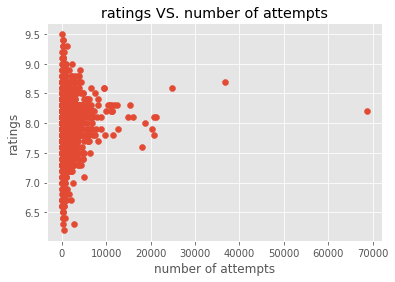

In [20]:
plt.scatter(all_recipes['num_tried'], all_recipes['rating'])
plt.xlabel("number of attempts")
plt.ylabel("ratings")
plt.title("ratings VS. number of attempts")

Text(0, 0.5, 'count')

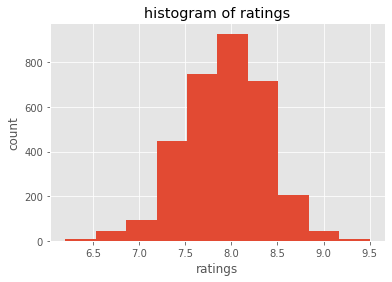

In [21]:
plt.hist(all_recipes['rating'])
plt.title('histogram of ratings')
plt.xlabel('ratings')
plt.ylabel('count')

## Study of Different Groups Using Groupby
#### Groupby Study Master Cooks
In this part, we analyze the data within two groups. (master cook group and others)

In [22]:
# master chefs
authors = all_recipes[['author', 'master']]
authors = authors.drop_duplicates()
master_ratio = sum(authors['master'])/len(authors)
print('The percentage of master cooks is %.2f'%master_ratio + '.')

The percentage of master cooks is 0.18.


In [23]:
master_recipe = sum(all_recipes['master'])/len(all_recipes)
print('The percentage of recipes prepared by master cooks is %.2f'%master_recipe + '.')

The percentage of recipes prepared by master cooks is 0.37.


In [26]:
ifMaster = all_recipes.groupby(['master'])
colFun = {'num_tried':['count','mean','min','max','std'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifMaster.agg(colFun)

num_tried                                      rating            \
           count        mean  min    max          std  count  min  max   
master                                                                   
False       2030  776.018719  100  36799  1768.740682   2030  6.2  9.4   
True        1215  959.387654  100  68706  2596.670564   1215  6.3  9.5   

                           num_ingred                              
            mean       std      count min max      mean       std  
master                                                             
False   7.861034  0.428511       2030   1  23  7.189655  3.451272  
True    8.045844  0.457751       1215   1  26  7.518519  3.494799

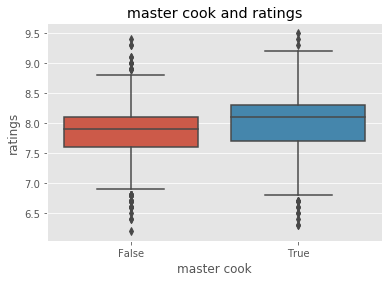

In [119]:
ax = sns.boxplot(x = 'master', y = 'rating', data = all_recipes, order = [False, True])
ax.set(xlabel='master cook', ylabel='ratings', title = 'master cook and ratings')
plt.show()

By comparison, more people tried the recipes created by master cooks. The ratings are also higher for the recipes created by master cooks though not much different and this is the same for number of ingredients.

In [108]:
ifMaster.agg(['count', 'mean'])[['exclusive', 'picture']]

exclusive           picture          
           count      mean   count      mean
master                                      
False       2030  0.212315    2030  0.660591
True        1215  0.468313    1215  0.758848

By comparison, the recipes created by master cooks has higher chance to be exclusive. Also, more recipes that are created by master cooks have picture descriptions.

#### Groupby Study Exclusive
In this part, we analyze the recipes that are divided with respect to whether the recipe is exclusive to the website.

In [109]:
ifExclusive = all_recipes.groupby(['exclusive'])

In [110]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifExclusive.agg(colFun)

num_tried                         rating                      \
              count        mean  min    max  count  min  max      mean   
exclusive                                                                
False          2245  786.531849  100  24704   2245  6.2  9.5  7.890646   
True           1000  975.210000  100  68706   1000  6.5  9.4  8.019100   

                    num_ingred                              
                std      count min max      mean       std  
exclusive                                                   
False      0.444587       2245   1  26  7.195546  3.403833  
True       0.445133       1000   1  23  7.576000  3.604333

More users tried the exclusive recipes and the ratings for exclusive recipes is slightly higher. The number of ingredients used in exclusive recipes is more or less the same when compared to non-exclusive ones.

In [111]:
ifExclusive.agg(['count', 'mean'])['picture']

,count,mean
exclusive,,
False,2245,0.66147
True,1000,0.77800


Exclusive menus tend to have more pictures in the description of the recipes.

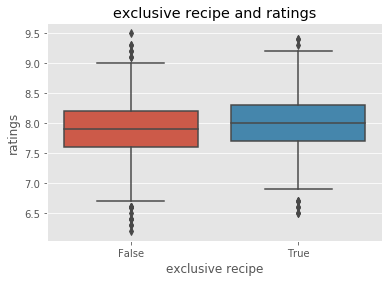

In [118]:
ax = sns.boxplot(x = 'exclusive', y = 'rating', data = all_recipes, order = [False, True])
ax.set(xlabel='exclusive recipe', ylabel='ratings', title = 'exclusive recipe and ratings')
plt.show()

#### Groupby Study Picture

In [112]:
ifPicture = all_recipes.groupby(['picture'])

In [113]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifPicture.agg(colFun)

num_tried                         rating                      \
            count        mean  min    max  count  min  max      mean   
picture                                                                
False         982  608.419552  100   9976    982  6.3  9.5  7.818839   
True         2263  947.196642  100  68706   2263  6.2  9.4  7.978568   

                  num_ingred                              
              std      count min max      mean       std  
picture                                                   
False    0.444495        982   1  19  6.952138  3.120213  
True     0.441849       2263   1  26  7.469289  3.601725

More people tried the recipe with pictures. The ratings are somewhat similar.

In [114]:
ifPicture.agg(['count', 'mean'])['exclusive']

,count,mean
picture,,
False,982,0.226069
True,2263,0.343791


Recipes with pictures are more likely to be exclusive.

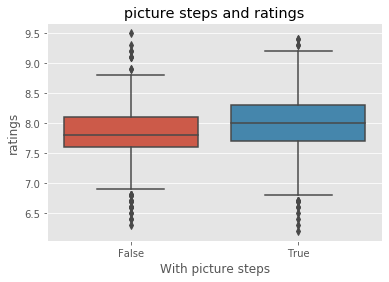

In [117]:
ax = sns.boxplot(x = 'picture', y = 'rating', data = all_recipes, order = [False, True])
ax.set(xlabel='With picture steps', ylabel='ratings', title = 'picture steps and ratings')
plt.show()

### Master, Exclusive & Picture (mep)

In [115]:
mep_group = all_recipes.groupby(['master', 'exclusive', 'picture'])
mep_group.size()

master  exclusive  picture
False   False      False      617
                   True       982
        True       False       72
                   True       359
True    False      False      143
                   True       503
        True       False      150
                   True       419
dtype: int64

In [116]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['min','max','mean'],
          'num_ingred':['min', 'max', 'mean']}
mep_analysis = mep_group.agg(colFun)
mep_analysis

num_tried                          rating       \
                             count         mean  min    max    min  max   
master exclusive picture                                                  
False  False     False         617   537.620746  100   8037    6.4  9.1   
                 True          982   870.993890  100  24704    6.2  9.3   
       True      False          72   627.708333  115   4706    6.6  8.6   
                 True          359   955.696379  101  36799    6.9  9.4   
True   False     False         143   626.048951  101   9976    6.3  9.5   
                 True          503   972.586481  100  21236    6.3  9.0   
       True      False         150   873.573333  101   7456    6.5  9.1   
                 True          419  1088.028640  100  68706    6.5  9.4   

                                   num_ingred                
                              mean        min max      mean  
master exclusive picture                                     
False  False     False    7.798379          1  19  6.927066  
                 True     7.859980          1  23  7.072301  
       True      False    7.816667          2  16  7.638889  
                 True     7.980501          1  23  7.871866  
True   False     False    7.872028          1  15  6.867133  
                 True     8.068986          1  26  7.858847  
       True      False    7.853333          1  16  6.806667  
                 True     8.146301          1  19  7.587112

#### Groupby Study Authors
In this part, we try to study questions related to groups divided according to authors.

In [117]:
authorGroup = all_recipes.groupby(['author'])

In [118]:
author_size = authorGroup.size().sort_values(ascending = False).to_frame()
author_size.columns = ['num_recipes']
author_size.head()

,num_recipes
author,
冇伱灬冇我,50
yanyanfoodtube,39
玉池桃红,38
懒饭App,37
日食记,33


In [119]:
# summary data of the most hardworking author (produces the most recipes)
all_recipes[all_recipes.author == '冇伱灬冇我'].describe()

,num_ingred,num_tried,rating
count,50.000000,50.000000,50.000000
mean,11.280000,1284.960000,8.402000
std,2.899965,2071.870997,0.307385
min,3.000000,110.000000,7.400000
25%,9.000000,253.500000,8.200000
50%,12.000000,407.000000,8.400000
75%,13.000000,1728.000000,8.600000
max,17.000000,11093.000000,9.100000


In [120]:
def productive_list(number_recipes, df):
    '''
    Input: number_recipes integer number of recipes made by the author
            df: dataframe
    Output: shortened dataframes containing only productive authors
    '''
    author_list = author_size[author_size.num_recipes >= number_recipes].index.tolist()
    ifProductive = []
    for _ in range(len(all_recipes)):
        ifProductive.append(all_recipes.author[_] in author_list)
    return df[ifProductive]

In [75]:
# select the most productive author lists (with recipes greater than 10)
prod_list = productive_list(20, all_recipes)
prod_list.describe()

,num_ingred,num_tried,rating
count,433.000000,433.000000,433.00000
mean,8.390300,867.886836,8.10485
std,3.312798,1752.426686,0.46198
min,1.000000,100.000000,6.30000
25%,6.000000,190.000000,7.80000
50%,8.000000,314.000000,8.10000
75%,10.000000,735.000000,8.40000
max,26.000000,18632.000000,9.50000


In [65]:
prod_author_list = prod_list[['author', 'master']].drop_duplicates()
prod_author_list.master.sum()

28

In [66]:
def mastercook_ratio(low, high):
    '''
    Input: low lower bound of number of recipes made by the author
            high upper bound of number of recipes made by the author
    Return: Tuple describing master cook ratios
    '''
    list_ = []
    if low < 1 or high > 50:
        raise ValueError('enter some number between 1 and 47')
    for i in range(low, high + 1):
        prod_list = productive_list(i, all_recipes)
        prod_author_list = prod_list[['author', 'master']].drop_duplicates()
        list_.append((i,(prod_author_list.master.sum()/len(prod_author_list))))
    return list_

In [67]:
a = mastercook_ratio(1,50)

Text(0.5, 1.0, 'Productive author and ratio of master cooks')

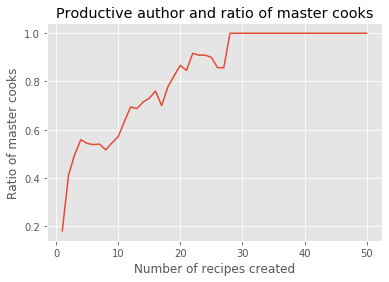

In [68]:
a_list = list(zip(*a))
plt.plot(a_list[0], a_list[1])
plt.xlabel("Number of recipes created")
plt.ylabel("Ratio of master cooks")
plt.title("Productive author and ratio of master cooks")

#### Groupby Study Number of Ingredients

In [71]:
ingredGroup = all_recipes.groupby('num_ingred')

In [122]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std']}
ingredGroup.agg(colFun)

num_tried                          rating                      \
               count         mean  min    max  count  min  max      mean   
num_ingred                                                                 
1                 76   600.434211  103   3733     76  7.1  9.4  8.119737   
2                137   523.737226  101   5954    137  6.7  9.5  7.951825   
3                210   796.561905  100  11643    210  6.6  9.3  7.884762   
4                261   767.923372  100  20837    261  6.3  9.4  7.822989   
5                365  1070.410959  100  68706    365  6.3  9.1  7.844384   
6                382   797.204188  100  14793    382  6.2  9.2  7.842932   
7                406   872.283251  100  20806    406  6.5  9.1  7.846798   
8                332   778.524096  100  16031    332  6.4  9.1  7.915964   
9                293   849.887372  100  18632    293  6.4  8.9  7.943003   
10               237   983.535865  100  24704    237  6.7  9.2  8.059494   
11               159   953.012579  100  10856    159  6.6  8.8  7.976730   
12               129   711.387597  102   7456    129  6.9  9.3  8.134109   
13                90   996.533333  100  20204     90  7.1  8.8  8.114444   
14                59   802.118644  105   6464     59  7.0  8.8  8.037288   
15                50  1055.160000  102   9533     50  6.9  8.9  8.236000   
16                21   340.952381  103   1033     21  7.0  8.9  8.138095   
17                18   990.777778  108   6099     18  7.9  9.0  8.333333   
18                 5   355.400000  108    769      5  8.0  9.0  8.540000   
19                 8   292.125000  161    681      8  7.7  8.3  8.100000   
20                 1   532.000000  532    532      1  7.7  7.7  7.700000   
21                 1   934.000000  934    934      1  8.3  8.3  8.300000   
22                 2   529.500000  317    742      2  8.1  8.4  8.250000   
23                 2   255.000000  180    330      2  7.8  8.1  7.950000   
26                 1   707.000000  707    707      1  8.3  8.3  8.300000   

                      
                 std  
num_ingred            
1           0.458118  
2           0.535106  
3           0.511641  
4           0.485490  
5           0.397592  
6           0.428315  
7           0.438378  
8           0.423357  
9           0.418486  
10          0.440969  
11          0.401610  
12          0.428387  
13          0.365526  
14          0.367141  
15          0.353848  
16          0.455496  
17          0.278652  
18          0.397492  
19          0.207020  
20               NaN  
21               NaN  
22          0.212132  
23          0.212132  
26               NaN

Text(0.5, 1.0, 'Number of Ingredients VS. Average Number of Attempts')

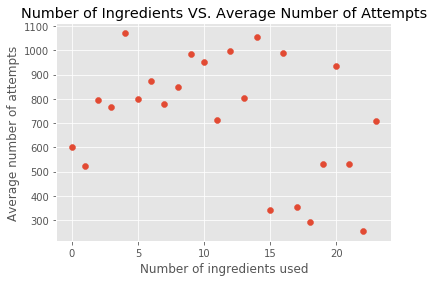

In [84]:
plt.scatter(range(len(ingredGroup)),ingredGroup.agg(colFun).num_tried['mean'].tolist())
plt.xlabel('Number of ingredients used')
plt.ylabel('Average number of attempts')
plt.title('Number of Ingredients VS. Average Number of Attempts')

Text(0.5, 1.0, 'Number of Ingredients VS. Mean Ratings')

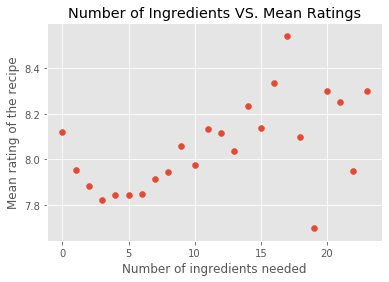

In [83]:
plt.scatter(range(len(ingredGroup)),ingredGroup.agg(colFun).rating['mean'].tolist())
plt.xlabel('Number of ingredients needed')
plt.ylabel('Mean rating of the recipe')
plt.title('Number of Ingredients VS. Mean Ratings')

Text(0.5, 1.0, 'Number of Ingredients VS. Number of Recipes')

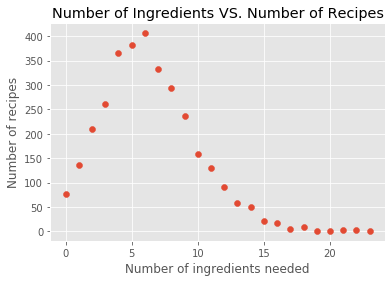

In [82]:
plt.scatter(range(len(ingredGroup)),ingredGroup.agg(colFun).rating['count'].tolist())
plt.xlabel('Number of ingredients needed')
plt.ylabel('Number of recipes')
plt.title('Number of Ingredients VS. Number of Recipes')

### Group Study by Categories

In [148]:
categoryGroup = all_recipes.groupby(['category'])

In [149]:
categoryGroup.agg(['sum','count','mean'])

num_ingred                 master                 num_tried        \
                sum count      mean    sum count      mean       sum count   
category                                                                     
beef           3215   391  8.222506  157.0   391  0.401535    316007   391   
chicken        5536   762  7.265092  261.0   762  0.342520    617538   762   
duck            396    53  7.471698   13.0    53  0.245283     28265    53   
egg            1721   308  5.587662  109.0   308  0.353896    412061   308   
fish            396    53  7.471698   13.0    53  0.245283     28164    53   
lamb           1264   144  8.777778   50.0   144  0.347222     67024   144   
pork           6652   858  7.752914  353.0   858  0.411422    730722   858   
shrimp         2356   346  6.809249  124.0   346  0.358382    189307   346   
tofu           2194   330  6.648485  135.0   330  0.409091    351886   330   

                       rating                 picture                  \
                 mean     sum count      mean     sum count      mean   
category                                                                
beef       808.202046  3115.7   391  7.968542   262.0   391  0.670077   
chicken    810.417323  6013.5   762  7.891732   540.0   762  0.708661   
duck       533.301887   422.9    53  7.979245    37.0    53  0.698113   
egg       1337.860390  2429.7   308  7.888636   215.0   308  0.698052   
fish       531.396226   423.0    53  7.981132    37.0    53  0.698113   
lamb       465.444444  1170.5   144  8.128472   102.0   144  0.708333   
pork       851.657343  6849.2   858  7.982751   627.0   858  0.730769   
shrimp     547.130058  2752.5   346  7.955202   225.0   346  0.650289   
tofu      1066.321212  2556.6   330  7.747273   218.0   330  0.660606   

         exclusive                  
               sum count      mean  
category                            
beef         118.0   391  0.301790  
chicken      249.0   762  0.326772  
duck          15.0    53  0.283019  
egg           92.0   308  0.298701  
fish          15.0    53  0.283019  
lamb          36.0   144  0.250000  
pork         258.0   858  0.300699  
shrimp       110.0   346  0.317919  
tofu         107.0   330  0.324242

## Study of Ingredients

In [51]:
def df_preprocess(df):
    df = df.drop_duplicates().dropna(axis = 0, how = 'any')
    df = df.set_index('title')
    df['ingredients'] = list(map(lambda s: normalize_ingredients(s.split(',')), df['ingredients']))
    df['num_ingred'] = df['ingredients'].apply(lambda list_: len(list_))
    df = df[['ingredients','num_ingred','author','master','num_tried','rating','picture','exclusive']]
    return df

In [52]:
def popular_ingredients(df):
    list_ = []
    for i in range(len(df)):
        list_.extend(df['ingredients'][i])
    dict_ = {}
    for element in list_:
        dict_[element] = dict_.get(element, 0) + 1
    return dict_

In [53]:
popular_dict = popular_ingredients(all_recipes)

In [54]:
sorted(popular_dict.items(), key=lambda kv: kv[1], reverse = True)

[('salt', 1952),
 ('soy sauce', 1794),
 ('oil', 1602),
 ('scallion', 1601),
 ('hot peppers', 1556),
 ('ginger', 1359),
 ('alcohol', 1278),
 ('garlic', 1007),
 ('sugar', 978),
 ('spice', 765),
 ('water', 727),
 ('pork', 619),
 ('egg', 608),
 ('chicken', 512),
 ('starch', 457),
 ('culinary herb', 359),
 ('MSG', 332),
 ('noodles', 323),
 ('tomatoes or tomato products', 321),
 ('carrots', 297),
 ('vinegar', 283),
 ('black pepper', 273),
 ('rice', 249),
 ('mushroom', 248),
 ('tofu', 244),
 ('shrimp', 244),
 ('potatoes', 230),
 ('beef', 205),
 ('other pork products', 203),
 ('other special cooking sauce', 201),
 ('white pepper', 199),
 ('other chicken products', 193),
 ('tofu product', 131),
 ('dry products', 123),
 ('sesame', 115),
 ('蜂蜜', 114),
 ('bean sauce', 110),
 ('beans', 107),
 ('other beef products', 101),
 ('other eggs', 86),
 ('lamb', 84),
 ('lemon or lime', 76),
 ('flour', 75),
 ('celery', 70),
 ('西兰花', 65),
 ('萝卜', 63),
 ('dried fruits', 58),
 ('cucumber', 55),
 ('fish', 49),
 (

### The codes below demonstrate the popularity of ingredients in each major category

In [55]:
pork = df_preprocess(pork)
pork_dict = popular_ingredients(pork)
sorted(pork_dict.items(), key=lambda kv: kv[1], reverse = True)

[('soy sauce', 576),
 ('salt', 505),
 ('pork', 484),
 ('ginger', 436),
 ('scallion', 421),
 ('oil', 405),
 ('alcohol', 391),
 ('hot peppers', 390),
 ('sugar', 323),
 ('garlic', 254),
 ('water', 253),
 ('spice', 209),
 ('other pork products', 187),
 ('starch', 166),
 ('noodles', 121),
 ('egg', 109),
 ('MSG', 109),
 ('rice', 89),
 ('vinegar', 87),
 ('culinary herb', 69),
 ('white pepper', 65),
 ('carrots', 60),
 ('other special cooking sauce', 59),
 ('potatoes', 59),
 ('tomatoes or tomato products', 50),
 ('mushroom', 48),
 ('beans', 47),
 ('sesame', 47),
 ('black pepper', 46),
 ('bean sauce', 37),
 ('dry products', 36),
 ('tofu', 32),
 ('腌菜', 27),
 ('yeast', 24),
 ('蜂蜜', 23),
 ('other chicken products', 21),
 ('cabbage', 20),
 ('other noodles', 18),
 ('dried fruits', 18),
 ('茄子', 17),
 ('flour', 15),
 ('冬瓜', 14),
 ('lotus', 14),
 ('other eggs', 14),
 ('celery', 13),
 ('tofu product', 12),
 ('韭菜', 12),
 ('萝卜', 11),
 ('other beef products', 10),
 ('饺子皮', 10),
 ('shrimp', 10),
 ('白菜', 10),

In [56]:
chicken = df_preprocess(chicken)
chicken_dict = popular_ingredients(chicken)
sorted(chicken_dict.items(), key=lambda kv: kv[1], reverse = True)

[('chicken', 499),
 ('soy sauce', 483),
 ('salt', 448),
 ('hot peppers', 386),
 ('oil', 360),
 ('alcohol', 332),
 ('ginger', 312),
 ('scallion', 286),
 ('garlic', 259),
 ('sugar', 216),
 ('spice', 159),
 ('other chicken products', 142),
 ('water', 135),
 ('black pepper', 107),
 ('potatoes', 86),
 ('starch', 86),
 ('carrots', 86),
 ('egg', 85),
 ('蜂蜜', 82),
 ('mushroom', 77),
 ('vinegar', 77),
 ('culinary herb', 76),
 ('tomatoes or tomato products', 67),
 ('rice', 62),
 ('noodles', 57),
 ('lemon or lime', 50),
 ('other special cooking sauce', 43),
 ('white pepper', 39),
 ('coke', 37),
 ('MSG', 36),
 ('dry products', 33),
 ('西兰花', 30),
 ('sesame', 25),
 ('curry', 23),
 ('dried fruits', 19),
 ('bean sauce', 18),
 ('beans', 18),
 ('flour', 14),
 ('cucumber', 13),
 ('生菜', 13),
 ('celery', 11),
 ('青菜', 6),
 ('南瓜', 6),
 ('other beef products', 6),
 ('yeast', 6),
 ('百香果', 6),
 ('pork', 5),
 ('草果', 5),
 ('腌菜', 5),
 ('山药', 5),
 ('tofu product', 5),
 ('special sauce for cooking seafood', 4),
 ('m

In [57]:
beef = df_preprocess(beef)
beef_dict = popular_ingredients(beef)
sorted(beef_dict.items(), key=lambda kv: kv[1], reverse = True)

[('soy sauce', 257),
 ('scallion', 252),
 ('oil', 226),
 ('salt', 223),
 ('hot peppers', 211),
 ('beef', 201),
 ('ginger', 181),
 ('spice', 174),
 ('alcohol', 174),
 ('garlic', 141),
 ('sugar', 107),
 ('tomatoes or tomato products', 101),
 ('water', 90),
 ('culinary herb', 83),
 ('black pepper', 72),
 ('mushroom', 64),
 ('carrots', 63),
 ('potatoes', 57),
 ('other beef products', 51),
 ('starch', 49),
 ('other special cooking sauce', 38),
 ('MSG', 36),
 ('noodles', 29),
 ('egg', 27),
 ('rice', 26),
 ('vinegar', 22),
 ('萝卜', 22),
 ('bean sauce', 18),
 ('white pepper', 16),
 ('celery', 14),
 ('西兰花', 12),
 ('curry', 12),
 ('生菜', 8),
 ('bean sprouts', 8),
 ('cabbage', 7),
 ('bamboo shoots', 7),
 ('mirin', 7),
 ('pork', 7),
 ('草果', 7),
 ('sesame', 6),
 ('dry products', 6),
 ('椰浆', 5),
 ('other chicken products', 5),
 ('beans', 5),
 ('tofu', 5),
 ('hawthorn', 4),
 ('other noodles', 4),
 ('cucumber', 3),
 ('lemon or lime', 3),
 ('蔬菜', 3),
 ('flour', 3),
 ('yeast', 3),
 ('soda', 3),
 ('白菜', 3)

In [58]:
lamb = df_preprocess(lamb)
lamb_dict = popular_ingredients(lamb)
sorted(lamb_dict.items(), key=lambda kv: kv[1], reverse = True)

[('spice', 131),
 ('hot peppers', 117),
 ('salt', 116),
 ('scallion', 110),
 ('soy sauce', 87),
 ('lamb', 84),
 ('alcohol', 80),
 ('ginger', 75),
 ('oil', 63),
 ('culinary herb', 54),
 ('garlic', 40),
 ('sugar', 31),
 ('carrots', 26),
 ('water', 21),
 ('MSG', 18),
 ('萝卜', 18),
 ('potatoes', 17),
 ('other special cooking sauce', 15),
 ('black pepper', 13),
 ('dried fruits', 13),
 ('white pepper', 11),
 ('starch', 11),
 ('vinegar', 9),
 ('dry products', 9),
 ('noodles', 8),
 ('草果', 7),
 ('rice', 7),
 ('山药', 5),
 ('tofu product', 5),
 ('other lamb products', 5),
 ('蜂蜜', 4),
 ('sesame', 4),
 ('egg', 4),
 ('other noodles', 4),
 ('砂仁', 3),
 ('bean sauce', 3),
 ('白芷', 3),
 ('西兰花', 2),
 ('tomatoes or tomato products', 2),
 ('锡纸', 2),
 ('other pork products', 2),
 ('白菜', 2),
 ('yeast', 2),
 ('hawthorn', 2),
 ('南瓜', 1),
 ('peanuts', 1),
 ('mushroom', 1),
 ('celery', 1),
 ('lemon or lime', 1),
 ('茶叶', 1),
 ('蔬菜', 1),
 ('ricecake', 1),
 ('海带', 1),
 ('flour', 1),
 ('fish', 1),
 ('青菜', 1),
 ('木耳', 1

In [59]:
duck = df_preprocess(duck)
duck_dict = popular_ingredients(duck)
sorted(duck_dict.items(), key=lambda kv: kv[1], reverse = True)

[('ginger', 40),
 ('alcohol', 40),
 ('scallion', 39),
 ('salt', 34),
 ('hot peppers', 33),
 ('garlic', 30),
 ('oil', 29),
 ('soy sauce', 20),
 ('sugar', 18),
 ('fish', 15),
 ('tofu', 13),
 ('white pepper', 9),
 ('water', 8),
 ('culinary herb', 8),
 ('mushroom', 7),
 ('special sauce for cooking seafood', 6),
 ('vinegar', 5),
 ('MSG', 4),
 ('spice', 4),
 ('starch', 4),
 ('other special cooking sauce', 4),
 ('tomatoes or tomato products', 3),
 ('lemon or lime', 3),
 ('other fish product', 3),
 ('bean sauce', 2),
 ('sesame', 2),
 ('pork', 2),
 ('cabbage', 1),
 ('carrots', 1),
 ('beans', 1),
 ('草果', 1),
 ('noodles', 1),
 ('other noodles', 1),
 ('dry products', 1),
 ('萝卜', 1),
 ('black pepper', 1),
 ('egg', 1),
 ('蜂蜜', 1)]

In [60]:
fish = df_preprocess(fish)
fish_dict = popular_ingredients(fish)
sorted(fish_dict.items(), key=lambda kv: kv[1], reverse = True)

[('ginger', 40),
 ('alcohol', 40),
 ('scallion', 39),
 ('salt', 34),
 ('hot peppers', 33),
 ('garlic', 30),
 ('oil', 29),
 ('soy sauce', 20),
 ('sugar', 18),
 ('fish', 15),
 ('tofu', 13),
 ('white pepper', 9),
 ('water', 8),
 ('culinary herb', 8),
 ('mushroom', 7),
 ('special sauce for cooking seafood', 6),
 ('vinegar', 5),
 ('MSG', 4),
 ('spice', 4),
 ('starch', 4),
 ('other special cooking sauce', 4),
 ('tomatoes or tomato products', 3),
 ('lemon or lime', 3),
 ('other fish product', 3),
 ('bean sauce', 2),
 ('sesame', 2),
 ('pork', 2),
 ('cabbage', 1),
 ('carrots', 1),
 ('beans', 1),
 ('草果', 1),
 ('noodles', 1),
 ('other noodles', 1),
 ('dry products', 1),
 ('萝卜', 1),
 ('black pepper', 1),
 ('egg', 1),
 ('蜂蜜', 1)]

In [61]:
shrimp = df_preprocess(shrimp)
shrimp_dict = popular_ingredients(shrimp)
sorted(shrimp_dict.items(), key=lambda kv: kv[1], reverse = True)

[('salt', 223),
 ('shrimp', 212),
 ('scallion', 196),
 ('oil', 177),
 ('hot peppers', 151),
 ('ginger', 142),
 ('alcohol', 136),
 ('garlic', 112),
 ('soy sauce', 104),
 ('egg', 93),
 ('sugar', 71),
 ('starch', 65),
 ('water', 53),
 ('lobster', 49),
 ('MSG', 45),
 ('rice', 35),
 ('spice', 31),
 ('white pepper', 29),
 ('tomatoes or tomato products', 28),
 ('culinary herb', 24),
 ('carrots', 21),
 ('noodles', 20),
 ('beans', 19),
 ('cucumber', 19),
 ('冬瓜', 17),
 ('tofu', 17),
 ('celery', 16),
 ('bamboo shoots', 15),
 ('vinegar', 15),
 ('西兰花', 14),
 ('black pepper', 14),
 ('pork', 13),
 ('other special cooking sauce', 13),
 ('mushroom', 11),
 ('other chicken products', 10),
 ('other beef products', 8),
 ('lemon or lime', 8),
 ('bean sauce', 8),
 ('西葫芦', 7),
 ('special sauce for cooking seafood', 7),
 ('萝卜', 6),
 ('dry products', 6),
 ('potatoes', 6),
 ('other noodles', 5),
 ('韭菜', 5),
 ('菠菜', 4),
 ('紫菜', 4),
 ('cabbage', 4),
 ('cheese', 4),
 ('sesame', 4),
 ('flour', 4),
 ('菠萝', 4),
 ('sod

In [62]:
egg = df_preprocess(egg)
egg_dict = popular_ingredients(egg)
sorted(egg_dict.items(), key=lambda kv: kv[1], reverse = True)

[('egg', 234),
 ('salt', 175),
 ('oil', 157),
 ('scallion', 104),
 ('soy sauce', 84),
 ('sugar', 79),
 ('water', 71),
 ('hot peppers', 64),
 ('noodles', 63),
 ('other eggs', 62),
 ('pork', 44),
 ('garlic', 42),
 ('ginger', 41),
 ('tomatoes or tomato products', 41),
 ('alcohol', 39),
 ('vinegar', 33),
 ('MSG', 28),
 ('flour', 25),
 ('rice', 23),
 ('spice', 22),
 ('culinary herb', 21),
 ('carrots', 17),
 ('other beef products', 17),
 ('black pepper', 15),
 ('韭菜', 15),
 ('other special cooking sauce', 14),
 ('tofu', 13),
 ('starch', 13),
 ('sesame', 12),
 ('mushroom', 11),
 ('cucumber', 10),
 ('dry products', 10),
 ('shrimp', 10),
 ('菠菜', 7),
 ('other pork products', 6),
 ('white pepper', 6),
 ('生菜', 6),
 ('cheese', 5),
 ('dried fruits', 5),
 ('西葫芦', 5),
 ('peanuts', 4),
 ('potatoes', 4),
 ('西兰花', 3),
 ('special sauce for cooking seafood', 3),
 ('yeast', 3),
 ('milk related products', 3),
 ('other chicken products', 3),
 ('秋葵', 3),
 ('青菜', 3),
 ('cream', 2),
 ('cabbage', 2),
 ('bean sauce

In [63]:
tofu = df_preprocess(tofu)
tofu_dict = popular_ingredients(tofu)
sorted(tofu_dict.items(), key=lambda kv: kv[1], reverse = True)

[('salt', 194),
 ('hot peppers', 171),
 ('soy sauce', 163),
 ('oil', 156),
 ('scallion', 154),
 ('tofu', 148),
 ('sugar', 115),
 ('tofu product', 108),
 ('garlic', 99),
 ('ginger', 92),
 ('water', 88),
 ('pork', 62),
 ('starch', 59),
 ('egg', 54),
 ('MSG', 52),
 ('alcohol', 46),
 ('spice', 31),
 ('vinegar', 30),
 ('tomatoes or tomato products', 26),
 ('noodles', 23),
 ('carrots', 22),
 ('mushroom', 22),
 ('dry products', 21),
 ('bean sauce', 20),
 ('culinary herb', 16),
 ('white pepper', 15),
 ('beans', 15),
 ('celery', 14),
 ('flour', 13),
 ('sesame', 13),
 ('other chicken products', 12),
 ('fish', 12),
 ('other special cooking sauce', 11),
 ('other beef products', 9),
 ('腌菜', 8),
 ('other eggs', 8),
 ('yeast', 7),
 ('rice', 7),
 ('shrimp', 7),
 ('black pepper', 4),
 ('cucumber', 4),
 ('韭菜', 4),
 ('special sauce for cooking seafood', 4),
 ('青菜', 4),
 ('白菜', 4),
 ('萝卜', 3),
 ('马兰头', 3),
 ('木耳', 3),
 ('chocolate', 3),
 ('milk related products', 2),
 ('chicken', 2),
 ('海带', 2),
 ('蛤蜊', 2